In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def display_best_fit_2048(size="small", rel_pos_emb="linear_cpb"):
    a = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"1_all_losses.npy", allow_pickle=True)
    b = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"2_all_losses.npy", allow_pickle=True)
    c = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"3_all_losses.npy", allow_pickle=True)
    d = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"4_all_losses.npy", allow_pickle=True)
    e = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"5_all_losses.npy", allow_pickle=True)

    all = np.array([a, b, c, d, e])
    all_avg = np.mean(all, axis=0)
    all_avg = np.mean(all_avg, axis=0)

    x = np.arange(len(all_avg))[128:]
    y = all_avg[128:]

    m, b = np.polyfit(x, y, 1)

    print("Relative positional embedding type:", rel_pos_emb)
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.plot(x, all_avg[128:])
    plt.plot(x, m*x+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size " + size)
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Relative positional embedding type: linear_cpb
Loss slope across token index: 7.382606693094317e-07
Loss offset: 5.20647874444337


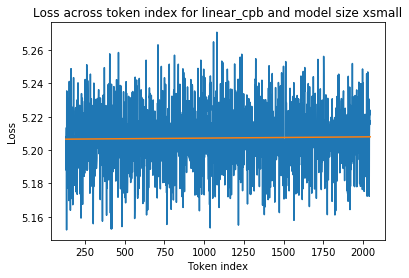

Relative positional embedding type: log_cpb
Loss slope across token index: 1.0582429128392825e-06
Loss offset: 5.195921509602078


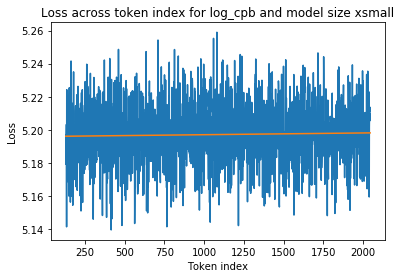

Relative positional embedding type: fourier_cpb
Loss slope across token index: 0.00023104240518697844
Loss offset: 5.203576756244917


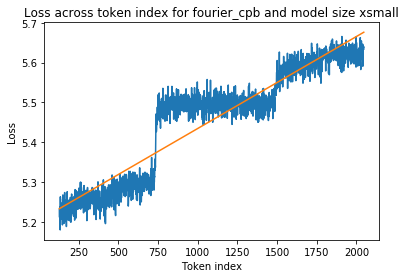

Relative positional embedding type: alibi
Loss slope across token index: 8.901720126939598e-07
Loss offset: 5.312968370035365


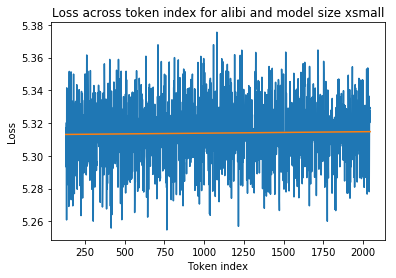

Relative positional embedding type: rotary
Loss slope across token index: 0.00022613600014336838
Loss offset: 5.625763570538174


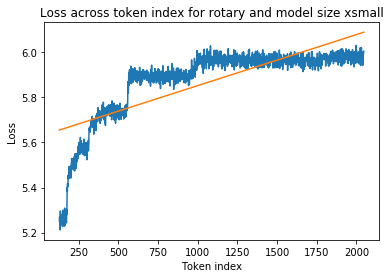

In [4]:
display_best_fit_2048("xsmall", "linear_cpb")
display_best_fit_2048("xsmall", "log_cpb")
display_best_fit_2048("xsmall", "fourier_cpb")
display_best_fit_2048("xsmall", "alibi")
display_best_fit_2048("xsmall", "rotary")

Relative positional embedding type: linear_cpb
Loss slope across token index: 8.072748706829849e-07
Loss offset: 5.013195972734188


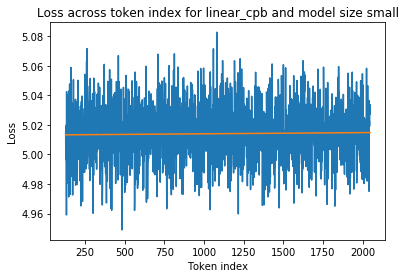

Relative positional embedding type: log_cpb
Loss slope across token index: 2.079706944251717e-06
Loss offset: 5.016636890280346


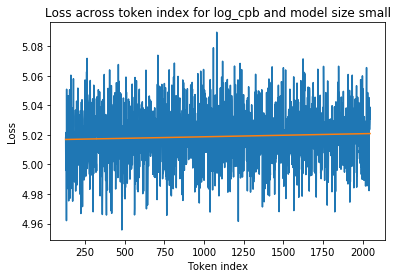

Relative positional embedding type: fourier_cpb
Loss slope across token index: 0.00027481693713235256
Loss offset: 4.997550006668256


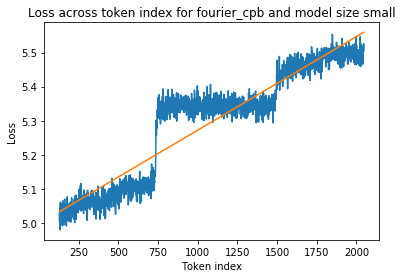

Relative positional embedding type: alibi
Loss slope across token index: 8.918046403364356e-07
Loss offset: 5.062218402865418


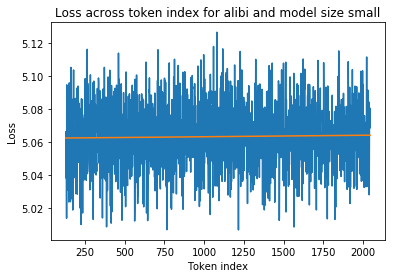

Relative positional embedding type: rotary
Loss slope across token index: 0.00030035362530314336
Loss offset: 5.618641940648451


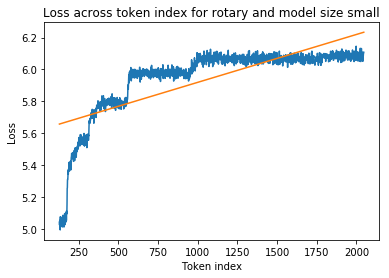

In [5]:
display_best_fit_2048("small", "linear_cpb")
display_best_fit_2048("small", "log_cpb")
display_best_fit_2048("small", "fourier_cpb")
display_best_fit_2048("small", "alibi")
display_best_fit_2048("small", "rotary")

In [6]:
def display_best_fit_2048_trained(size="xsmall", rel_pos_emb="linear_cpb"):
    a = np.load("results_relative_trained2048/result_"+size+"_"+rel_pos_emb+"1_2048_losses.npz")
    a = a.f.arr_0
    all_avg = np.mean(a, axis=0)


    x = np.arange(len(all_avg))[128:]
    y = all_avg[128:]

    m, b = np.polyfit(x, y, 1)

    print("Meta-learning loss @ 1000 - 50")
    print(all_avg[1000] - all_avg[50])
    print("Meta-learning loss @ 500 - 50")
    print(all_avg[500] - all_avg[50])
    print("Meta-learning loss @ 250 - 50")
    print(all_avg[250] - all_avg[50])


    print("Model trained at length 2048:")
    print("Relative positional embedding type:", rel_pos_emb)
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.plot(x, all_avg[128:])
    plt.plot(x, m*x+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size " + size)
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Meta-learning loss @ 1000 - 50
-0.06862641978230233
Meta-learning loss @ 500 - 50
-0.04328959608724858
Meta-learning loss @ 250 - 50
0.001910457860456738
Model trained at length 2048:
Relative positional embedding type: linear_cpb
Loss slope across token index: 1.052155134599495e-06
Loss offset: 5.0367779471978595


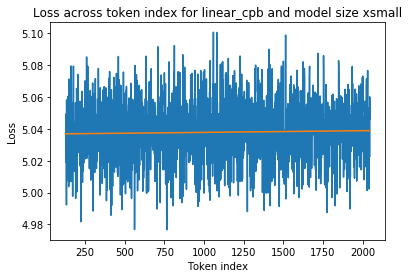

Meta-learning loss @ 1000 - 50
-0.09415066632915003
Meta-learning loss @ 500 - 50
-0.0780296990756284
Meta-learning loss @ 250 - 50
-0.014848171949611633
Model trained at length 2048:
Relative positional embedding type: log_cpb
Loss slope across token index: -1.1831535045351049e-06
Loss offset: 5.066855582369581


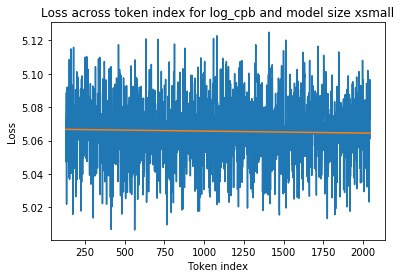

Meta-learning loss @ 1000 - 50
-0.07756134002620385
Meta-learning loss @ 500 - 50
-0.07034245843757958
Meta-learning loss @ 250 - 50
-0.002461009654053825
Model trained at length 2048:
Relative positional embedding type: fourier_cpb
Loss slope across token index: -1.2326103116532124e-09
Loss offset: 5.108371037742887


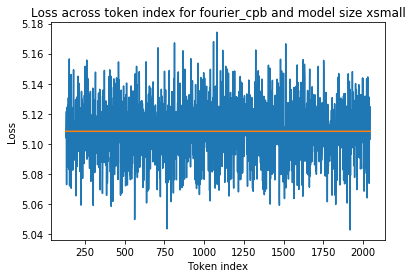

Meta-learning loss @ 1000 - 50
-0.059117500079506335
Meta-learning loss @ 500 - 50
-0.04960899902526705
Meta-learning loss @ 250 - 50
0.0046204841396768614
Model trained at length 2048:
Relative positional embedding type: alibi
Loss slope across token index: 7.713408641571533e-07
Loss offset: 5.096401250860112


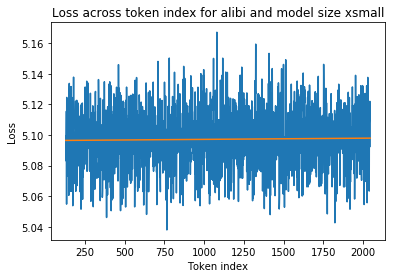

Meta-learning loss @ 1000 - 50
-0.09294660487798545
Meta-learning loss @ 500 - 50
-0.08163231111664526
Meta-learning loss @ 250 - 50
-0.017029621126472883
Model trained at length 2048:
Relative positional embedding type: rotary
Loss slope across token index: -1.921631679836783e-06
Loss offset: 5.117640702869186


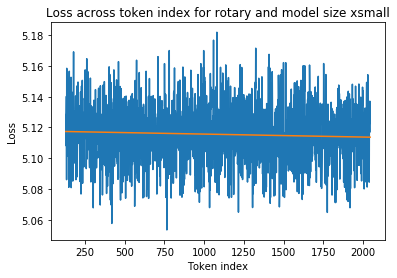

In [7]:
display_best_fit_2048_trained(size="xsmall", rel_pos_emb="linear_cpb")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="log_cpb")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="fourier_cpb")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="alibi")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="rotary")

In [8]:
def display_best_fit_2048_trained128(size="small", rel_pos_emb="linear_cpb"):
    a = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"1_all_losses.npy", allow_pickle=True)

    all_avg = np.mean(a, axis=0)
    x = np.arange(len(all_avg))[128:]
    y = all_avg[128:]

    m, b = np.polyfit(x, y, 1)

    print("Meta-learning loss @ 1000 - 50")
    print(all_avg[1000] - all_avg[50])
    print("Meta-learning loss @ 500 - 50")
    print(all_avg[500] - all_avg[50])
    print("Meta-learning loss @ 250 - 50")
    print(all_avg[250] - all_avg[50])

    print("Model trained at length 128")
    print("Relative positional embedding type:", rel_pos_emb)
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.plot(x, all_avg[128:])
    plt.plot(x, m*x+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size " + size)
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Meta-learning loss @ 1000 - 50
-0.05723726996176115
Meta-learning loss @ 500 - 50
-0.051095409669602354
Meta-learning loss @ 250 - 50
0.02729755449354876
Model trained at length 128
Relative positional embedding type: linear_cpb
Loss slope across token index: 9.444340483451466e-07
Loss offset: 5.206373560306571


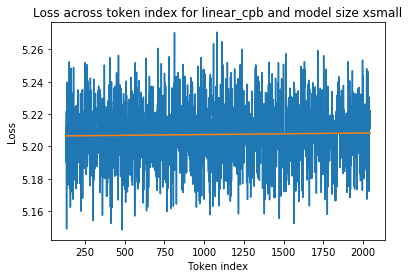

Meta-learning loss @ 1000 - 50
-0.053782748661015845
Meta-learning loss @ 500 - 50
-0.044004357803274274
Meta-learning loss @ 250 - 50
0.026669063275746474
Model trained at length 128
Relative positional embedding type: log_cpb
Loss slope across token index: 7.509394429990526e-07
Loss offset: 5.180688937656116


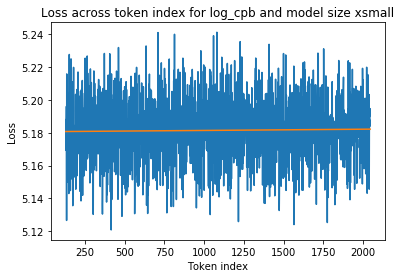

Meta-learning loss @ 1000 - 50
0.20681733183208717
Meta-learning loss @ 500 - 50
0.021908392161434698
Meta-learning loss @ 250 - 50
0.04936609735342312
Model trained at length 128
Relative positional embedding type: fourier_cpb
Loss slope across token index: 0.0002143076823028238
Loss offset: 5.218727376046655


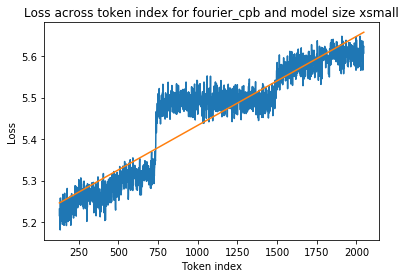

Meta-learning loss @ 1000 - 50
-0.05785303183515644
Meta-learning loss @ 500 - 50
-0.055721999971923175
Meta-learning loss @ 250 - 50
0.013251367180029838
Model trained at length 128
Relative positional embedding type: alibi
Loss slope across token index: 5.800215584963853e-07
Loss offset: 5.307181453022144


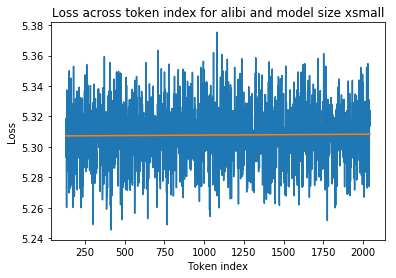

Meta-learning loss @ 1000 - 50
0.6191341508391961
Meta-learning loss @ 500 - 50
0.4526090774955618
Meta-learning loss @ 250 - 50
0.33125307109637436
Model trained at length 128
Relative positional embedding type: rotary
Loss slope across token index: 0.00019676482909821634
Loss offset: 5.6605749419326745


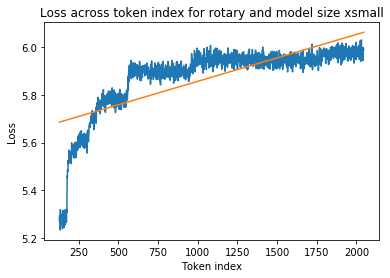

In [9]:
display_best_fit_2048_trained128("xsmall", "linear_cpb")
display_best_fit_2048_trained128("xsmall", "log_cpb")
display_best_fit_2048_trained128("xsmall", "fourier_cpb")
display_best_fit_2048_trained128("xsmall", "alibi")
display_best_fit_2048_trained128("xsmall", "rotary")

In [10]:
def display_best_fit_2048_long(rel_pos_emb="linear_cpb", length=256):
    a = np.load("xsmall_"+rel_pos_emb+"_" + str(length) + "_1_2048_losses.npz", allow_pickle=True)
    a = a.f.arr_0

    all_avg = np.mean(a, axis=0)

    x = np.arange(len(all_avg))
    y = all_avg[length:]

    m, b = np.polyfit(x[length:], y, 1)

    print("Meta-learning loss @ 1000 - 50")
    print(all_avg[1000] - all_avg[50])
    print("Meta-learning loss @ 500 - 50")
    print(all_avg[500] - all_avg[50])
    print("Meta-learning loss @ 250 - 50")
    print(all_avg[250] - all_avg[50])

    print("Meta learning improvment from 500 to 1000 tokens:")
    print((all_avg[1000] - all_avg[50]) - (all_avg[500] - all_avg[50]))

    print("Relative positional embedding type:", rel_pos_emb)
    print("Line of best fit for token loss in extrapolation region (indices > train length)")
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.xscale("log", basex=2)
    #plt.yscale("log", basey=2)
    plt.plot(x, all_avg)
    plt.plot(x[length:], m*x[length:]+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size xsmall")
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Meta-learning loss @ 1000 - 50
-0.018163766700053596
Meta-learning loss @ 500 - 50
-0.018553654499400274
Meta-learning loss @ 250 - 50
0.008171431021601894
Meta learning improvment from 500 to 1000 tokens:
0.0003898877993466776
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 3.0287471886002346e-06
Loss offset: 3.9062929078084565


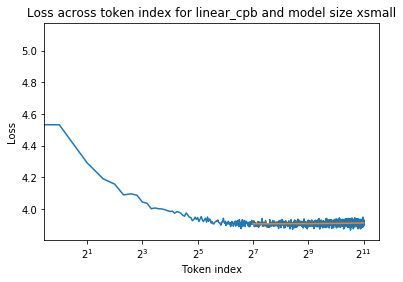

In [11]:
display_best_fit_2048_long("linear_cpb", 128)

Meta-learning loss @ 1000 - 50
-0.14205441182454104
Meta-learning loss @ 500 - 50
-0.1293173298283734
Meta-learning loss @ 250 - 50
-0.09223980813806776
Meta learning improvment from 500 to 1000 tokens:
-0.012737081996167632
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -5.21427621944125e-06
Loss offset: 3.6724990113564644


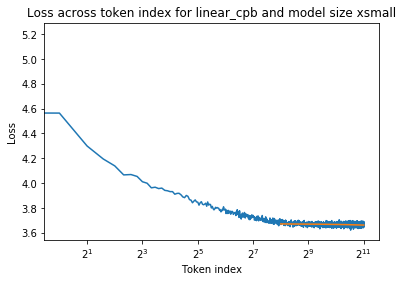

In [12]:
display_best_fit_2048_long("linear_cpb", 256)

Meta-learning loss @ 1000 - 50
-0.1820477464456105
Meta-learning loss @ 500 - 50
-0.1674685199450816
Meta-learning loss @ 250 - 50
-0.12007047183926067
Meta learning improvment from 500 to 1000 tokens:
-0.014579226500528897
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -5.9659728569453006e-06
Loss offset: 3.6052384736148215


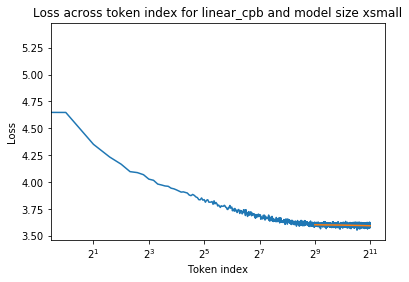

In [13]:
display_best_fit_2048_long("linear_cpb", 512)